In [1]:
import os
os.chdir('..')

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *

In [4]:
data_path = Path().cwd() / 'data'; data_path

PosixPath('/Users/uwaisiqbal/Code Repositories/RASM2019/data')

In [5]:
mask_path = data_path / 'task1_masks'; mask_path

PosixPath('/Users/uwaisiqbal/Code Repositories/RASM2019/data/task1_masks')

In [6]:
original_tif_files_path = data_path / 'raw_data' / 'image_files'

In [7]:
train_image_files = original_tif_files_path.ls(); len(train_image_files)

20

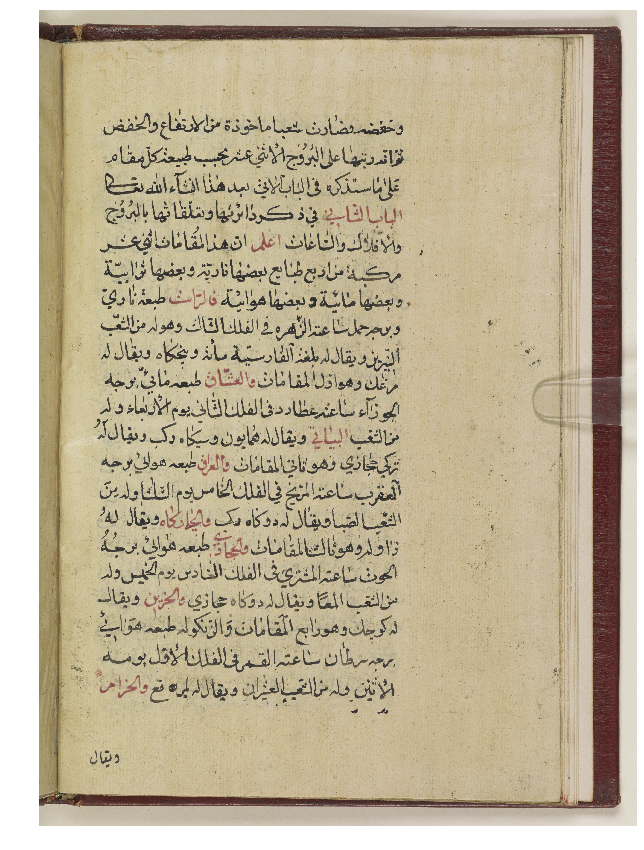

In [55]:
img_f = (data_path / 'task1_train' / 'Add MS 23494_0031.tif')
img = open_image(img_f)
img.show(figsize=(20, 15))

In [9]:
img.data.shape

torch.Size([3, 5176, 3793])

In [81]:
def get_patches_for_image(img, pw, ph, sw=None, sh=None):
    if not sw: sw = pw
    if not sh: sh = ph
    patches = img.data.unfold(0, 3, 3).unfold(1, pw, sw).unfold(2, ph, sh)
    return patches[0]

In [85]:
def plot_patched_image(p):
    _, axs = plt.subplots(p.shape[0], p.shape[1], figsize=(15,15))
    for i in range(p.shape[0]):
        for j in range(p.shape[1]):
            Image(p[i][j]).show(ax=axs[i, j])

In [101]:
def reconstruct_image_from_patches(patches):
    pw = patches.shape[-2]
    ph = patches.shape[-1]
    w = patches.shape[0] * pw
    h = patches.shape[1] * ph
    new_img = torch.zeros([3, w, h])
    for i in range(patches.shape[0]):
        for j in range(patches.shape[1]):
            patch_pixels = patches[i][j] # shape [3, pw, ph]
            new_img[:, pw*i: pw*(i+1), ph*j: ph*(j+1)] = patch_pixels
    return new_img

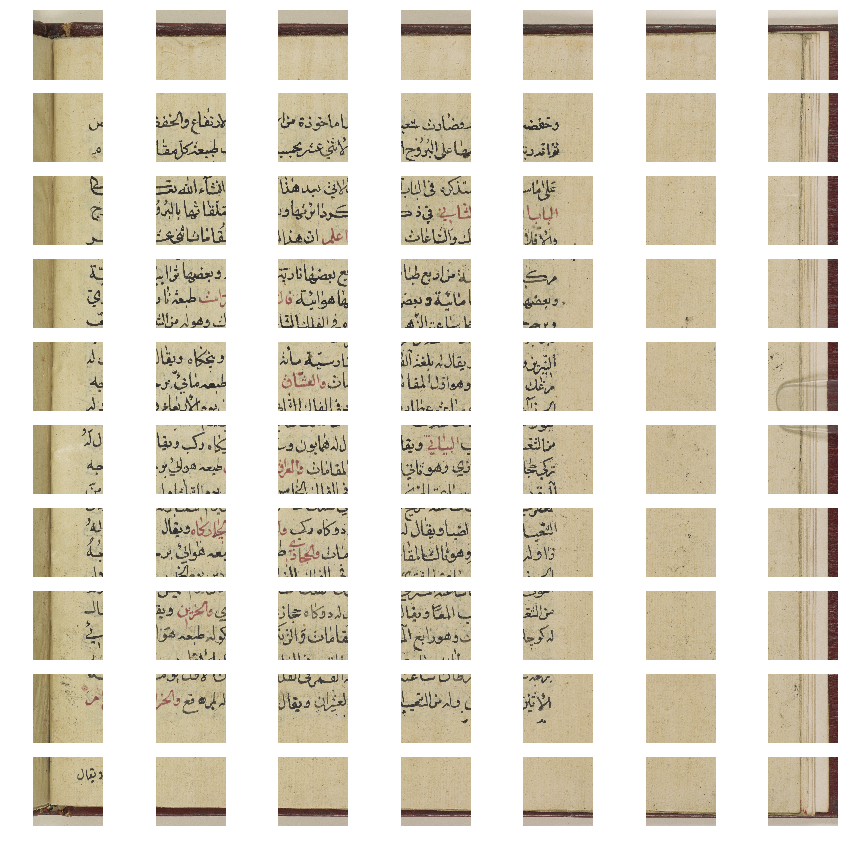

In [94]:
patches = get_patches_for_image(img, 128*4, 128*4)
plot_patched_image(patches)

In [98]:
patches.shape

torch.Size([10, 7, 3, 512, 512])

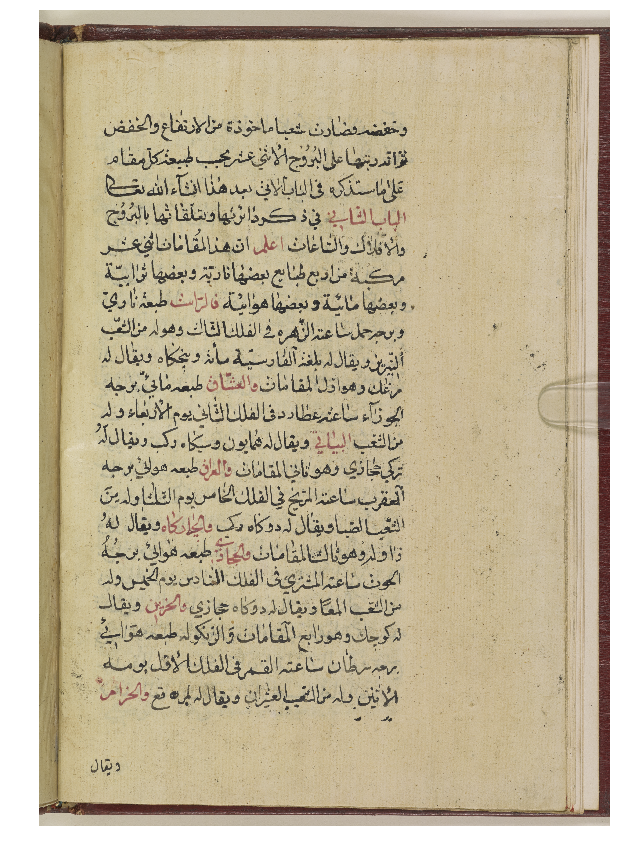

In [102]:
new_img = reconstruct_image_from_patches(patches)
Image(new_img).show(figsize=(20, 15))